In [90]:
import numpy as np
import matplotlib.pyplot as plt


In [91]:
# Read thermal history data
redshift_digitizer, temperature_digitizer = np.loadtxt('./thermal_history.csv', delimiter=', ', unpack=True)

In [92]:
# define constants
gamma = 5/3+0.01        # adiabatic constant for ideal monatomic gas
mu = 1.22           # mean molecular weight including a helium mass fraction 0.24
k_B = 1.380649E-23  # boltzmann constant in m^2 kg s^-2 K^-1
m_H = 1.66E-27      # mass of hydrogen atom in kg
Lambda = 0.05       # eaccretion eigenvalue

In [93]:
# define functions for calculation


In [94]:
# define the data point of plot
redshift = np.logspace(0, 3, 3000)
temperature = np.interp(redshift, redshift_digitizer, temperature_digitizer)

<Figure size 432x288 with 0 Axes>

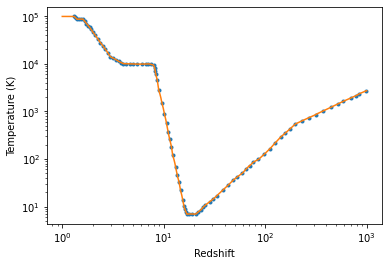

In [95]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Temperature (K)')
# thermal history data points from digitizer
axes.plot(redshift_digitizer, temperature_digitizer, '.')
axes.plot(redshift, temperature)



<Figure size 432x288 with 0 Axes>

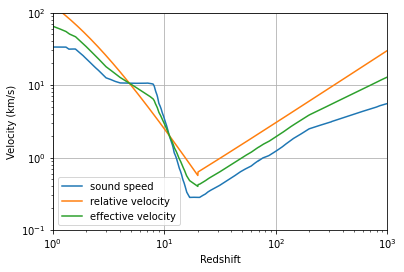

In [96]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_ylim([0.1, 100])
axes.set_xscale('log')
axes.set_xlim([1, 1000])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Velocity (km/s)')

# calculation of variables
# sound speed in km/s
# relative speed in km/s
# effective velocity in km/s
sound_speed = np.sqrt(gamma*k_B*temperature/mu/m_H) / 1000
relative_speed = np.piecewise(redshift, [redshift >= 20, redshift < 20], [lambda z: 30/1000*(1+z), lambda z: 620*(1+z)**-2.3])
effective_velocity = np.sqrt(sound_speed*relative_speed)

# effective velocity plot
axes.plot(redshift, sound_speed, label='sound speed')
axes.plot(redshift, relative_speed, label='relative velocity')
axes.plot(redshift, effective_velocity, label='effective velocity')

axes.grid()
axes.legend()

<Figure size 432x288 with 0 Axes>

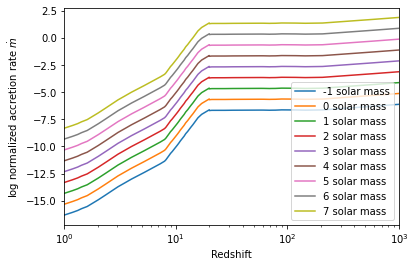

In [97]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
# axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log normalized accretion rate $\dot{m}$ ')

# calculation of accretion rate
def accretion_rate(M):
    return Lambda*0.321*(((1+redshift)/1000)**3)*(M)*effective_velocity**-3

# accretion rate plot
for i in range(-1, 8):
    axes.plot(redshift, np.log10(accretion_rate(10**i)), label=f'{i} solar mass')
axes.legend()
    

<Figure size 432x288 with 0 Axes>

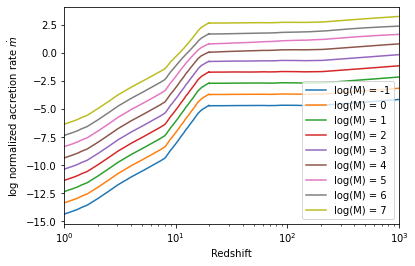

In [106]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
# axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log normalized accretion rate $\dot{m}$ ')

# variables for calculating accretion eigenvalue
def Bondi_radius(M):    # in cm
    return 1.34E16*(M)*np.power(effective_velocity, -2)
def beta(M):
    t_cr = Bondi_radius(M)/100/1000/effective_velocity  #in s
    x_e = 0.01
    Hubble_rate = 3.24E-18*np.sqrt(0.127)*np.power(1+redshift, 3/2) #in s^-1
    effective_viscosity = Hubble_rate*(1+1.78*x_e*np.power((1+redshift)/100, 5/2))
    return effective_viscosity*t_cr

# accretion eigenvalue in eq. 9 for small viscosity
def lambda_0(M):
    gamma = 1   # isothermal
    xi = 0.75*np.power((gamma+1)/(5-3*gamma), (gamma-1)/(gamma+1))
    def cs_cr(beta):
        cs_cr_0 = np.sqrt(2/(5-3*gamma))
        return (3*cs_cr_0+beta**xi)/(3+beta**xi)
    x_cr = np.power(cs_cr(beta(M)), -2)*(-1+np.sqrt(1+beta(M)*np.power(cs_cr(beta(M)), -3)))/(beta(M)*cs_cr(beta(M))**-3)
    return np.exp(9/2/(3+np.power(beta(M), 0.75)))*x_cr**2


# calculation of accretion rate
def accretion_rate(M):
    return lambda_0(M)*0.321*(((1+redshift)/1000)**3)*(M)*effective_velocity**-3

# accretion rate plot
for i in range(-1, 8):
    axes.plot(redshift, np.log10(accretion_rate(10**i)), label=f'log(M) = {i}')
axes.legend()

<Figure size 432x288 with 0 Axes>

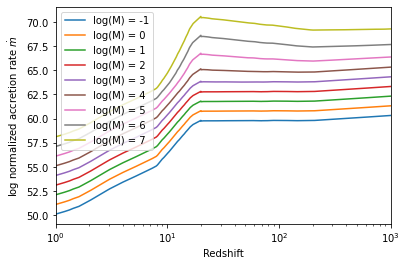

In [101]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
# axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log normalized accretion rate $\dot{m}$ ')

# include Hubble viscosity
# Bondi radius in cm
# Bondi crossing time in s
# Hubble rate in s^-1
# effective viscosity is in s^-1
def Bondi_radius(M):    
    return 1.34E16*(M)*np.power(effective_velocity, -2)
def Bondi_crossing_time(M):
    return Bondi_radius(M)/100/1000/effective_velocity
Hubble_rate = (3.24E-18)*np.sqrt(0.127)*np.power(1+redshift, 3/2)
ionization_factor = 0.0001
effective_viscosity = Hubble_rate*(1+1.78*ionization_factor*np.power((1+redshift)/100, 5/2))
def viscosity_scaling(M):
    return effective_viscosity*Bondi_crossing_time(M)
def critical_radius(M):     #x_cr
    return 0.5
p = 3 - 2.01
chi = 0.5
def accretion_eigenvalue_0(M):  # reference to eq. 9
    return
def accretion_eigenvalue_1(M):  # reference to eq. 18
    f_beta = 1+1.25*np.power(viscosity_scaling(M), p/(2-p))
    f_chi = np.power(np.exp(2-chi), p/(1-p))
    return f_beta*f_chi*np.exp(9/2/(3+np.power(viscosity_scaling(M), 0.75)))
def accretion_eigenvalue_2(M):  # reference to eq. 25
    beta_h = np.power(chi, p/(1-p))
    return 

# calculation of accretion rate
def accretion_rate(M):
    return accretion_eigenvalue_1(M)*0.321*(((1+redshift)/1000)**3)*(M)*effective_velocity**-3

# accretion rate plot
for i in range(-1, 8):
    axes.plot(redshift, np.log10(accretion_rate(10**i)), label=f'log(M) = {i}')
axes.legend()

<Figure size 432x288 with 0 Axes>

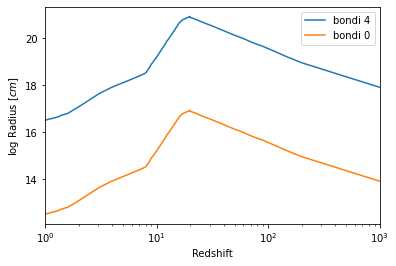

In [ ]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
# axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Radius $[cm]$ ')

axes.plot(redshift, np.log10(Bondi_radius(10**4)), label='bondi 4')
axes.plot(redshift, np.log10(Bondi_radius(1)), label='bondi 0')

axes.legend()